<a href="https://colab.research.google.com/github/anooprnathblq/DSA_Python/blob/main/Anoop_VC2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df_train=pd.read_csv('/content/train_ctrUa4K.csv')

In [82]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [83]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [84]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [85]:
df_train.isna().sum() #Checking for null values

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


FInding the unique values to see what is avaible in the place of null vlaues and replacing them by suitable mean/mode/median

In [86]:
df_train['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [87]:
df_train['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [88]:
df_train['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [89]:
df_train['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [90]:
df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [91]:
for i in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
  df_train[i]=df_train[i].fillna(df_train[i].mode()[0])

In [92]:
df_train.isna().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [93]:
df_train['LoanAmount'].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [94]:
df['LoanAmount'].mean()

146.41216216216216

In [95]:
df['LoanAmount'].median()

128.0

In [96]:
 df_train['LoanAmount']=df_train['LoanAmount'].fillna(df_train['LoanAmount'].median()) #filling NaNs with the mean

In [97]:
df_train['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [98]:
df_train['Loan_Amount_Term'].value_counts()

,count
Loan_Amount_Term,
360.0,512
180.0,44
480.0,15
300.0,13
240.0,4
84.0,4
120.0,3
60.0,2
36.0,2


In [99]:
 df_train['Loan_Amount_Term']=df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0]) #filling NaNs with the mode

In [100]:
df_train['Credit_History'].unique()

array([ 1.,  0., nan])

In [101]:
df_train['Credit_History']=df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0]) #filling NaNs with the mode

In [102]:
df_train.isna().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
df_train['Dependents'].unique()

In [103]:
df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [104]:
numerical_columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']

In [105]:
category_columns=['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status']

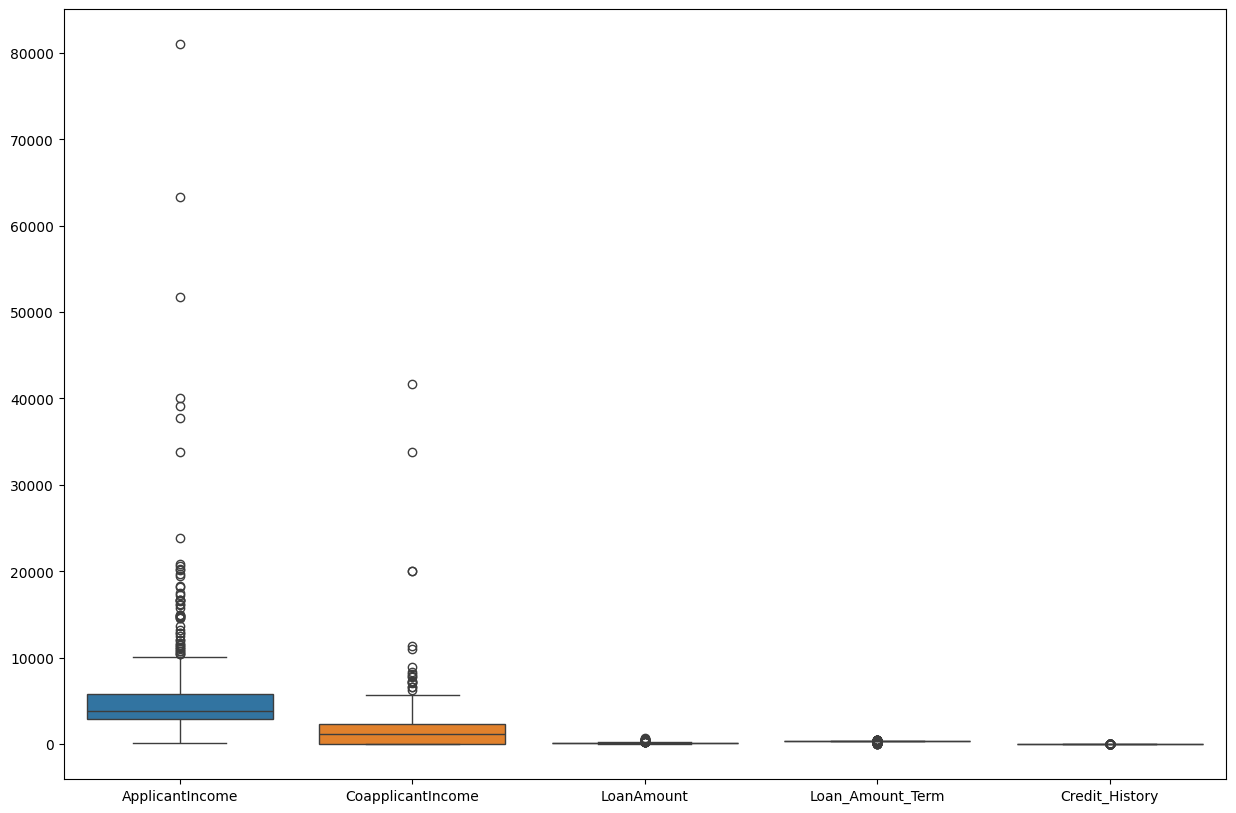

In [106]:
#Cheking for ouliers
features = df[['ApplicantIncome', 'CoapplicantIncome','LoanAmount','Loan_Amount_Term', 'Credit_History']]
plt.figure(figsize=(15,10))
sns.boxplot(data = features)
plt.show()

In [108]:
df_train=pd.get_dummies(df_train,columns=['Gender','Married','Property_Area'],dtype='int64')

In [110]:
df_train.head()

,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Y,0,1,1,0,0,0,1
1,LP001003,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,N,0,1,0,1,1,0,0
2,LP001005,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y,0,1,0,1,0,0,1
3,LP001006,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y,0,1,0,1,0,0,1
4,LP001008,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Y,0,1,1,0,0,0,1


In [111]:
manual_mapping={'Graduate':2,
                'Not Graduate':1,
                }
df_train['Education'] = df_train['Education'].map(manual_mapping)
df_train


,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,2,No,5849,0.0,128.0,360.0,1.0,Y,0,1,1,0,0,0,1
1,LP001003,1,2,No,4583,1508.0,128.0,360.0,1.0,N,0,1,0,1,1,0,0
2,LP001005,0,2,Yes,3000,0.0,66.0,360.0,1.0,Y,0,1,0,1,0,0,1
3,LP001006,0,1,No,2583,2358.0,120.0,360.0,1.0,Y,0,1,0,1,0,0,1
4,LP001008,0,2,No,6000,0.0,141.0,360.0,1.0,Y,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,2,No,2900,0.0,71.0,360.0,1.0,Y,1,0,1,0,1,0,0
610,LP002979,3+,2,No,4106,0.0,40.0,180.0,1.0,Y,0,1,0,1,1,0,0
611,LP002983,1,2,No,8072,240.0,253.0,360.0,1.0,Y,0,1,0,1,0,0,1
612,LP002984,2,2,No,7583,0.0,187.0,360.0,1.0,Y,0,1,0,1,0,0,1


In [113]:
df_train.head()

,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,2,No,5849,0.0,128.0,360.0,1.0,Y,0,1,1,0,0,0,1
1,LP001003,1,2,No,4583,1508.0,128.0,360.0,1.0,N,0,1,0,1,1,0,0
2,LP001005,0,2,Yes,3000,0.0,66.0,360.0,1.0,Y,0,1,0,1,0,0,1
3,LP001006,0,1,No,2583,2358.0,120.0,360.0,1.0,Y,0,1,0,1,0,0,1
4,LP001008,0,2,No,6000,0.0,141.0,360.0,1.0,Y,0,1,1,0,0,0,1


In [114]:
 manual_mapping={'No':2,
                'Yes':1,
                }
df_train['Self_Employed'] = df_train['Self_Employed'].map(manual_mapping)

In [115]:
df_train.head()

,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,2,2,5849,0.0,128.0,360.0,1.0,Y,0,1,1,0,0,0,1
1,LP001003,1,2,2,4583,1508.0,128.0,360.0,1.0,N,0,1,0,1,1,0,0
2,LP001005,0,2,1,3000,0.0,66.0,360.0,1.0,Y,0,1,0,1,0,0,1
3,LP001006,0,1,2,2583,2358.0,120.0,360.0,1.0,Y,0,1,0,1,0,0,1
4,LP001008,0,2,2,6000,0.0,141.0,360.0,1.0,Y,0,1,1,0,0,0,1


In [116]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_train['Dependents']=le.fit_transform(df_train['Dependents'])


In [119]:
 df_train['Loan_Status']=le.fit_transform(df_train['Loan_Status'])

In [120]:
df_train.head()

,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,2,2,5849,0.0,128.0,360.0,1.0,1,0,1,1,0,0,0,1
1,LP001003,1,2,2,4583,1508.0,128.0,360.0,1.0,0,0,1,0,1,1,0,0
2,LP001005,0,2,1,3000,0.0,66.0,360.0,1.0,1,0,1,0,1,0,0,1
3,LP001006,0,1,2,2583,2358.0,120.0,360.0,1.0,1,0,1,0,1,0,0,1
4,LP001008,0,2,2,6000,0.0,141.0,360.0,1.0,1,0,1,1,0,0,0,1


In [121]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df_train_orig=df_train.copy()
numerical_columns=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
df_train[numerical_columns]=ss.fit_transform(df_train[numerical_columns])


In [122]:
df_train.head()

,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,2,2,0.072991,-0.554487,-0.211241,0.273231,1.0,1,0,1,1,0,0,0,1
1,LP001003,1,2,2,-0.134412,-0.038732,-0.211241,0.273231,1.0,0,0,1,0,1,1,0,0
2,LP001005,0,2,1,-0.393747,-0.554487,-0.948996,0.273231,1.0,1,0,1,0,1,0,0,1
3,LP001006,0,1,2,-0.462062,0.251980,-0.306435,0.273231,1.0,1,0,1,0,1,0,0,1
4,LP001008,0,2,2,0.097728,-0.554487,-0.056551,0.273231,1.0,1,0,1,1,0,0,0,1


In [123]:

X_train=df_train.drop(['Loan_ID','Loan_Status'],axis=1) ##Loan ID s are all unique,Loan status is target variable


In [125]:
X_train.head()

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,2,2,0.072991,-0.554487,-0.211241,0.273231,1.0,0,1,1,0,0,0,1
1,1,2,2,-0.134412,-0.038732,-0.211241,0.273231,1.0,0,1,0,1,1,0,0
2,0,2,1,-0.393747,-0.554487,-0.948996,0.273231,1.0,0,1,0,1,0,0,1
3,0,1,2,-0.462062,0.251980,-0.306435,0.273231,1.0,0,1,0,1,0,0,1
4,0,2,2,0.097728,-0.554487,-0.056551,0.273231,1.0,0,1,1,0,0,0,1


In [126]:
y_train=df_train['Loan_Status']

In [128]:
y_train.head()


,Loan_Status
0,1
1,0
2,1
3,1
4,1


In [131]:
#Prediction using Logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()    #max-tier parameterset to overcome the warning ConvergenceWarning: lbfgs failed to converge (status=1):
                                            #STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.
model=lr.fit(X_train,y_train)

In [132]:
from sklearn.model_selection import KFold
kf_value=KFold(10)

In [133]:
from sklearn.model_selection import cross_val_score
cv_result=cross_val_score(model,X_train,y_train,cv=kf_value)

In [134]:
cv_result

array([0.77419355, 0.83870968, 0.74193548, 0.77419355, 0.78688525,
       0.80327869, 0.86885246, 0.85245902, 0.78688525, 0.83606557])

In [135]:
cv_result.mean()

0.8063458487572712

In [ ]:
#Prediction using Logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()    #max-tier parameterset to overcome the warning ConvergenceWarning: lbfgs failed to converge (status=1):
                                            #STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.
model=lr.fit(X_train,y_train)

In [136]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
model_knn=classifier.fit(X_train,y_train)


In [137]:
cv_result_knn=cross_val_score(model_knn,X_train,y_train,cv=kf_value)

In [138]:
cv_result_knn

array([0.74193548, 0.79032258, 0.67741935, 0.72580645, 0.73770492,
       0.73770492, 0.75409836, 0.7704918 , 0.75409836, 0.72131148])

In [139]:
cv_result_knn.mean()

0.7410893707033315

In [140]:
df_test=pd.read_csv('/content/test_lAUu6dG.csv')

In [141]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [142]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [143]:
df_test.isna().sum()

,0
Loan_ID,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6


In [144]:
df_test['Dependents']=df_test['Dependents'].fillna(df_test['Dependents'].mode()[0])
df_test['Self_Employed']=df_test['Self_Employed'].fillna(df_test['Self_Employed'].mode()[0])
df_test['Gender']=df_test['Gender'].fillna(df_test['Gender'].mode()[0])
df_test['LoanAmount']=df_test['LoanAmount'].fillna(df_test['LoanAmount'].median())
df_test['Loan_Amount_Term']=df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].mode()[0])
df_test['Credit_History']=df_test['Credit_History'].fillna(df_test['Credit_History'].mode()[0])

In [145]:
df_test.isna().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [146]:
df_test=pd.get_dummies(df_test,columns=['Gender','Married','Property_Area'],dtype='int64')

In [147]:
manual_mapping={'Graduate':2,
                'Not Graduate':1,
                }
df_test['Education'] =df_test['Education'].map(manual_mapping)
manual_mapping={'No':2,
                'Yes':1,
                }
df_test['Self_Employed'] = df_test['Self_Employed'].map(manual_mapping)



In [148]:
df_test['Dependents']=le.fit_transform(df_test['Dependents'])

In [149]:
df_test_orig=df_test.copy()
numerical_columns=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
df_test[numerical_columns]=ss.fit_transform(df_test[numerical_columns])


In [151]:
df_test.head()

,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001015,0,2,2,0.186461,-0.673335,-0.426780,0.266022,1.0,0,1,0,1,0,0,1
1,LP001022,1,2,2,-0.352692,-0.029848,-0.163953,0.266022,1.0,0,1,0,1,0,0,1
2,LP001031,2,2,2,0.039641,0.098849,1.183033,0.266022,1.0,0,1,0,1,0,0,1
3,LP001035,2,2,2,-0.502774,0.418877,-0.591047,0.266022,1.0,0,1,0,1,0,0,1
4,LP001051,0,1,2,-0.311909,-0.673335,-0.952433,0.266022,1.0,0,1,1,0,0,0,1


In [152]:
X_test=df_test.drop(['Loan_ID'],axis=1)

In [154]:
X_test.shape

(367, 15)

In [155]:
y_pred=model.predict(X_test)

In [156]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [157]:
y_pred=pd.DataFrame(y_pred)

In [158]:
y_pred

,0
0,1
1,1
2,1
3,1
4,1
...,...
362,1
363,1
364,1
365,1


In [194]:
sample=pd.read_csv('/content/sample_submission_49d68Cx.csv')

In [195]:
sample.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [196]:
df_test_orig.head()

,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001015,0,2,2,5720,0,110.0,360.0,1.0,0,1,0,1,0,0,1
1,LP001022,1,2,2,3076,1500,126.0,360.0,1.0,0,1,0,1,0,0,1
2,LP001031,2,2,2,5000,1800,208.0,360.0,1.0,0,1,0,1,0,0,1
3,LP001035,2,2,2,2340,2546,100.0,360.0,1.0,0,1,0,1,0,0,1
4,LP001051,0,1,2,3276,0,78.0,360.0,1.0,0,1,1,0,0,0,1


In [197]:
y_pred.head()

,0
0,1
1,1
2,1
3,1
4,1


In [198]:
y_pred.value_counts()

,count
0,
1,307
0,60


In [199]:
sample['Loan_Status']=y_pred

In [200]:
sample

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [201]:
sample['Loan_Status'].sum()

307

In [202]:
sample.replace([0,1],['N','Y'],inplace=True)

In [203]:
sample['Loan_Status'].value_counts()

,count
Loan_Status,
Y,307
N,60


In [204]:
sample.set_index('Loan_ID',inplace=True)

In [205]:
sample.head()

,Loan_Status
Loan_ID,
LP001015,Y
LP001022,Y
LP001031,Y
LP001035,Y
LP001051,Y


In [206]:
sample['Loan_Status'].value_counts()

,count
Loan_Status,
Y,307
N,60


In [209]:
sample.to_csv('predict_final.csv')

In [183]:
sample.head()

,Loan_Status
Loan_ID,
LP001015,1
LP001022,1
LP001031,1
LP001035,1
LP001051,1
